In [86]:
import pandas as pd
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import ParameterGrid

In [46]:
#!pip install pmdarima

In [45]:
from pmdarima import auto_arima, ARIMA, model_selection

In [17]:
df = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\ARIMA, SARIMA and SARIMAX\daily_revenue.csv",index_col='date',parse_dates=True, dayfirst=True)

In [18]:
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%


In [22]:
df['revenue'] = df['revenue'].str.replace(',','').astype(float)
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


In [24]:
df = df.asfreq('D')
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='date', length=1795, freq='D')

In [25]:
df = df.rename(columns={'revenue':'y'})
df.head()

,y,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


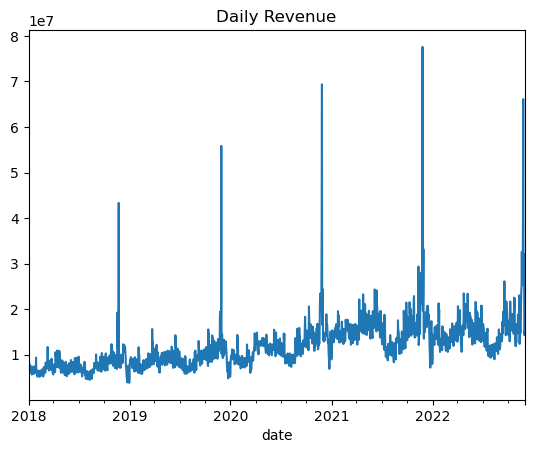

In [26]:
df['y'].plot(title='Daily Revenue')
plt.show()

C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\550838906.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['y'].resample('M').mean())


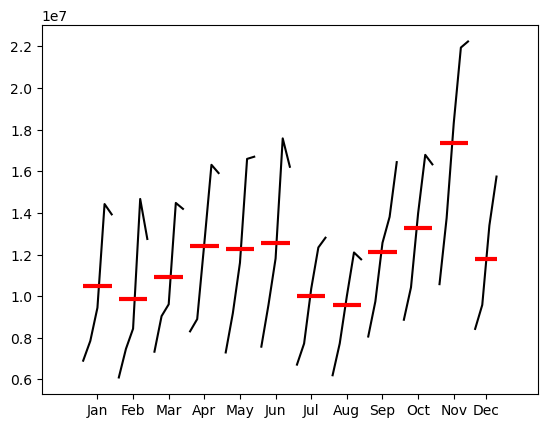

In [27]:
month_plot(df['y'].resample('M').mean())
plt.show()

C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\685137226.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['y'].resample('Q').mean())


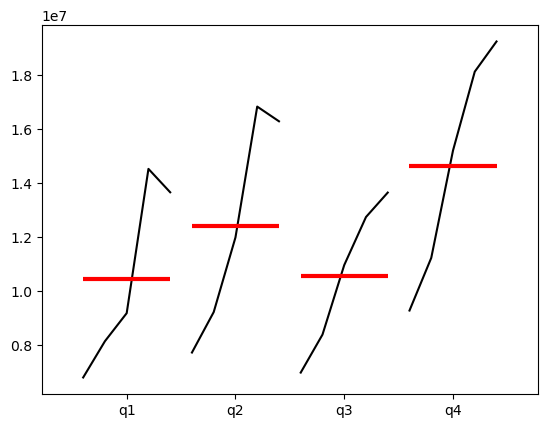

In [29]:
quarter_plot(df['y'].resample('Q').mean())
plt.show()

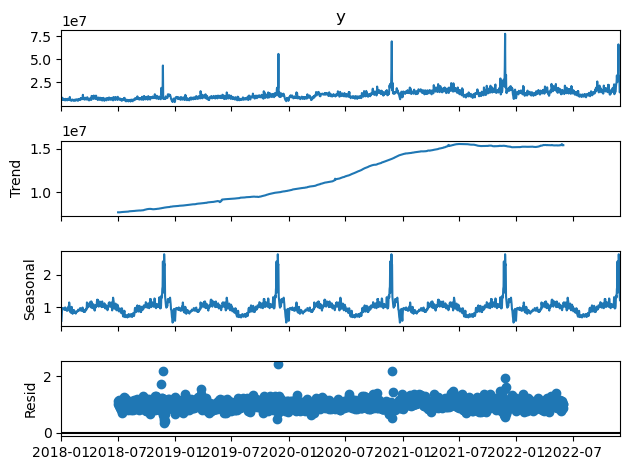

In [32]:
seasonal_decompose(df['y'], model='multiplicative',period=365).plot()
plt.show()

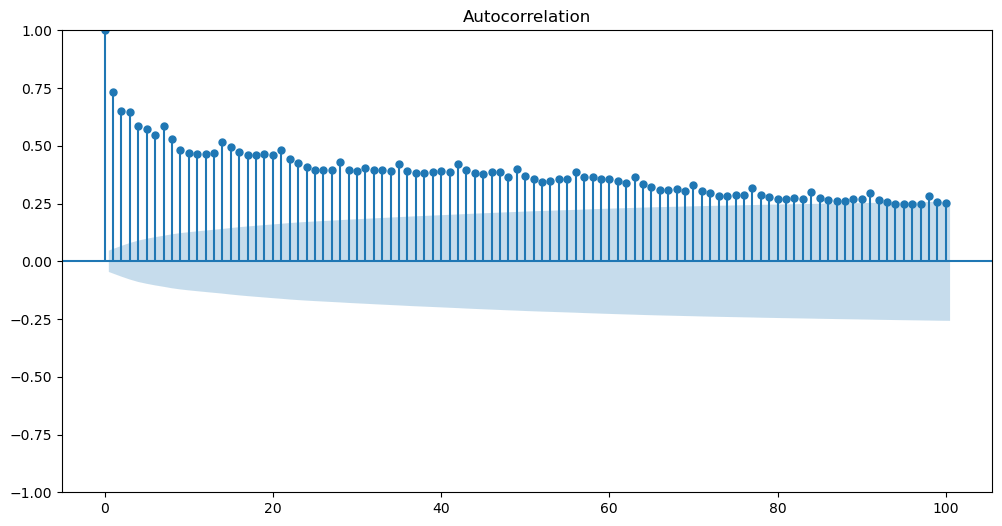

In [33]:
fig, ax = plt.subplots(figsize = (12,6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()


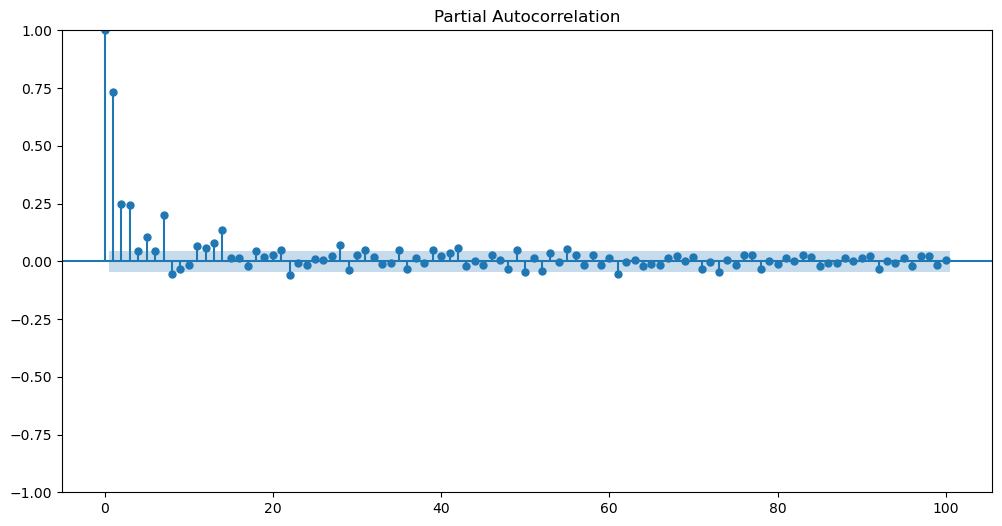

In [34]:
fig, ax = plt.subplots(figsize = (12,6))
plot_pacf(df['y'], lags=100, ax=ax)
plt.show()


## Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Example: load your time series (replace this with your actual data)
# Suppose df['value'] is your time series column
series = df.y

# Step 1: Apply the ADF test
result = adfuller(series)  # drop NaNs to avoid errors

# Step 2: Print the result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', result[2])
print('Number of observations used:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')

# Step 3: Interpret the result
if result[1] <= 0.05:
    print("\n✅ The series is likely stationary (reject H0).")
else:
    print("\n❌ The series is likely non-stationary (fail to reject H0).")


ADF Statistic: -2.5583995323513937
p-value: 0.101903608623861
Number of lags used: 21
Number of observations used: 1773
Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

❌ The series is likely non-stationary (fail to reject H0).


In [36]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Example: load your time series (replace this with your actual data)
# Suppose df['value'] is your time series column
series = df.y.diff().dropna()

# Step 1: Apply the ADF test
result = adfuller(series)  # drop NaNs to avoid errors

# Step 2: Print the result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', result[2])
print('Number of observations used:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')

# Step 3: Interpret the result
if result[1] <= 0.05:
    print("\n✅ The series is likely stationary (reject H0).")
else:
    print("\n❌ The series is likely non-stationary (fail to reject H0).")


ADF Statistic: -12.808786916715906
p-value: 6.513792026819147e-24
Number of lags used: 20
Number of observations used: 1773
Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

✅ The series is likely stationary (reject H0).


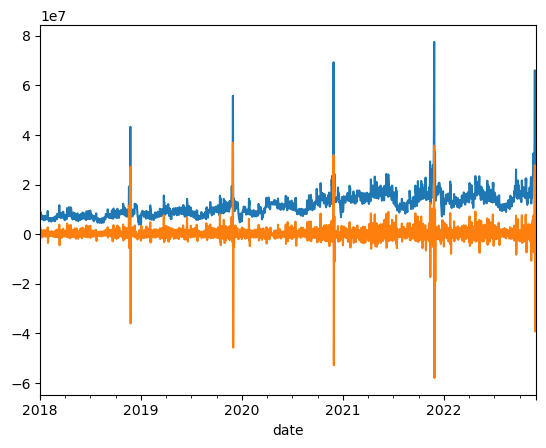

In [37]:
df.y.plot()
df.y.diff().dropna().plot()
plt.show()

In [38]:
df['y_diff'] = df.y.diff()
df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0


## ARIMA Model

In [67]:
test_days = 30
train = df.iloc[:-test_days]
test = df.iloc[-test_days:]


In [47]:
model = auto_arima(train['y'], seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1765
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -28817.267
Date:                Mon, 14 Apr 2025   AIC                          57650.535
Time:                        12:04:31   BIC                          57694.337
Sample:                    01-01-2018   HQIC                         57666.720
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4136      0.120     -3.449      0.001      -0.649      -0.179
ar.L2          0.3017      0.053      5.671      0.000       0.197       0.406
ar.L3          0.1570      0.028      5.705      0.000       0.103       0.211
ar.L4          0.0679      0.029      2.365      0.018       0.012       0.124
ar.L5          0.0466      0.024      1.937      0.053      -0.001       0.094
ma.L1         -0.1598      0.118     -1.354      0.176      -0.391       0.071
ma.L2         -0.7423      0.108     -6.872      0.000      -0.954      -0.531
sigma2      9.084e+12   1.86e-14   4.88e+26      0.000    9.08e+12    9.08e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            580903.25
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                             5.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.21e+42. Standard errors may be unstable.
"""

## Predictions

In [48]:
predictions_arima = model.predict(n_periods=len(test))
predictions_arima

2022-11-01    1.445299e+07
2022-11-02    1.474103e+07
2022-11-03    1.503283e+07
2022-11-04    1.527520e+07
2022-11-05    1.534078e+07
2022-11-06    1.553442e+07
2022-11-07    1.554542e+07
2022-11-08    1.563967e+07
2022-11-09    1.565016e+07
2022-11-10    1.569221e+07
2022-11-11    1.570256e+07
2022-11-12    1.571953e+07
2022-11-13    1.572734e+07
2022-11-14    1.573420e+07
2022-11-15    1.573904e+07
2022-11-16    1.574197e+07
2022-11-17    1.574462e+07
2022-11-18    1.574600e+07
2022-11-19    1.574734e+07
2022-11-20    1.574804e+07
2022-11-21    1.574869e+07
2022-11-22    1.574906e+07
2022-11-23    1.574937e+07
2022-11-24    1.574956e+07
2022-11-25    1.574971e+07
2022-11-26    1.574981e+07
2022-11-27    1.574988e+07
2022-11-28    1.574994e+07
2022-11-29    1.574997e+07
2022-11-30    1.575000e+07
Freq: D, dtype: float64

## Model Assessment

In [49]:
def model_assessment(train,test, predictions, chart_title=None):
    plt.figure(figsize=(10,4))

    plt.plot(train, label='train data')
    plt.plot(test, label = 'test data' )
    plt.plot(predictions, label = 'Forecast data')

    plt.title(chart_title)
    plt.legend()
    plt.show()

    rmse = root_mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test,predictions)

    print(f"RMSE : {rmse:.0f} ")
    print(f"MAE : {mae:.0f} ")
    print(f"MAPE : {100*mape:.1f} %")




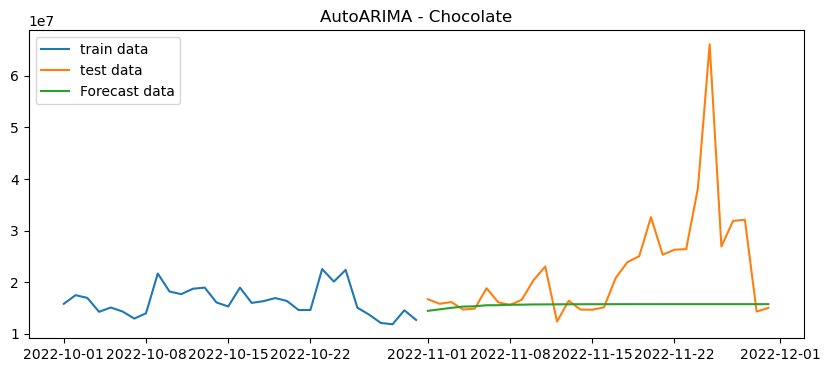

RMSE : 12366038 
MAE : 7267306 
MAPE : 24.1 %


In [54]:
model_assessment(train.y.loc['2022-10'],test.y,predictions_arima,"AutoARIMA - Chocolate")

## SARIMA

In [59]:
model_sarima = auto_arima(train['y'], m = 7)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28762.051
Date:                           Mon, 14 Apr 2025   AIC                          57546.103
Time:                                   14:55:14   BIC                          57606.331
Sample:                               01-01-2018   HQIC                         57568.358
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   4682.748      2.150      0.032     890.300    1.92e+04
ar.L1         -0.3476      0.072     -4.796      0.000      -0.490      -0.206
ar.L2          0.1856      0.032      5.721      0.000       0.122       0.249
ar.L3          0.1034      0.016      6.523      0.000       0.072       0.135
ma.L1         -0.1958      0.074     -2.656      0.008      -0.340      -0.051
ma.L2         -0.5684      0.060     -9.399      0.000      -0.687      -0.450
ar.S.L7        0.0805      0.181      0.445      0.656      -0.274       0.435
ar.S.L14       0.8713      0.172      5.070      0.000       0.534       1.208
ma.S.L7       -0.0035      0.176     -0.020      0.984      -0.349       0.342
ma.S.L14      -0.8322      0.157     -5.309      0.000      -1.139      -0.525
sigma2      9.294e+12      0.000   8.85e+16      0.000    9.29e+12    9.29e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            848669.44
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                             5.24
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.38e+31. Standard errors may be unstable.
"""

In [60]:
predictions_sarima = model_sarima.predict(n_periods=len(test))
predictions_sarima

2022-11-01    1.513409e+07
2022-11-02    1.504534e+07
2022-11-03    1.464455e+07
2022-11-04    1.382181e+07
2022-11-05    1.397997e+07
2022-11-06    1.697860e+07
2022-11-07    1.583310e+07
2022-11-08    1.605214e+07
2022-11-09    1.575798e+07
2022-11-10    1.523584e+07
2022-11-11    1.428022e+07
2022-11-12    1.448981e+07
2022-11-13    1.761294e+07
2022-11-14    1.658422e+07
2022-11-15    1.682758e+07
2022-11-16    1.635486e+07
2022-11-17    1.582117e+07
2022-11-18    1.482099e+07
2022-11-19    1.499258e+07
2022-11-20    1.780775e+07
2022-11-21    1.673574e+07
2022-11-22    1.694585e+07
2022-11-23    1.665827e+07
2022-11-24    1.616895e+07
2022-11-25    1.526414e+07
2022-11-26    1.547003e+07
2022-11-27    1.842695e+07
2022-11-28    1.745385e+07
2022-11-29    1.769225e+07
2022-11-30    1.726673e+07
Freq: D, dtype: float64

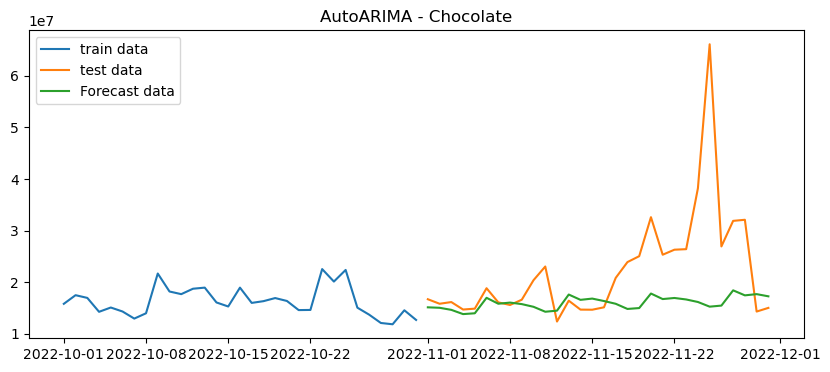

RMSE : 12152394 
MAE : 7210550 
MAPE : 24.5 %


In [61]:
model_assessment(train.y.loc['2022-10'],test.y,predictions_sarima,"AutoARIMA - Chocolate")

## SARIMAX

In [62]:
df.columns

Index(['y', 'discount_rate', 'coupon_rate', 'y_diff'], dtype='object')

In [63]:
df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0


In [64]:
df['discount_rate'] = df['discount_rate'].str.replace('%','').astype(float)
df['coupon_rate'] = df['coupon_rate'].str.replace('%','').astype(float)

df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27,1.09,NaN
2018-01-02,8922076.0,30.87,1.08,2651237.0
2018-01-03,8446101.0,28.11,1.01,-475975.0
2018-01-04,7785798.0,27.32,0.96,-660303.0
2018-01-05,6375303.0,25.70,0.90,-1410495.0


In [68]:
test_days = 30
exog_train = df.iloc[:-test_days,1:3]
exog_test = df.iloc[-test_days:,1:3]


In [70]:
exog_train

,discount_rate,coupon_rate
date,,
2018-01-01,34.27,1.09
2018-01-02,30.87,1.08
2018-01-03,28.11,1.01
2018-01-04,27.32,0.96
2018-01-05,25.70,0.90
...,...,...
2022-10-27,20.81,0.61
2022-10-28,21.44,0.55
2022-10-29,19.81,0.36


In [71]:
model_sarimax = auto_arima(train['y'], m = 7, X = exog_train)
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28613.022
Date:                           Mon, 14 Apr 2025   AIC                          57250.045
Time:                                   15:39:06   BIC                          57315.749
Sample:                               01-01-2018   HQIC                         57274.324
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1.641e+04   7882.662      2.082      0.037     960.986    3.19e+04
discount_rate   4.03e+05   2.35e+04     17.133      0.000    3.57e+05    4.49e+05
coupon_rate    9.229e+05   6.11e+04     15.105      0.000    8.03e+05    1.04e+06
ar.L1            -0.6527      0.155     -4.199      0.000      -0.957      -0.348
ar.L2             0.1829      0.049      3.768      0.000       0.088       0.278
ma.L1             0.1067      0.155      0.690      0.490      -0.196       0.410
ma.L2            -0.6924      0.124     -5.569      0.000      -0.936      -0.449
ar.S.L7           0.0523      0.187      0.280      0.780      -0.314       0.419
ar.S.L14          0.8999      0.178      5.067      0.000       0.552       1.248
ma.S.L7           0.0182      0.182      0.100      0.920      -0.339       0.376
ma.S.L14         -0.8500      0.161     -5.292      0.000      -1.165      -0.535
sigma2         7.655e+12      0.016   4.75e+14      0.000    7.65e+12    7.65e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           1075187.60
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             5.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+29. Standard errors may be unstable.
"""

In [72]:
predictions_sarimax = model_sarimax.predict(n_periods=len(test), X = exog_test)
predictions_sarimax

2022-11-01    1.675217e+07
2022-11-02    1.494557e+07
2022-11-03    1.488435e+07
2022-11-04    1.296427e+07
2022-11-05    1.205479e+07
2022-11-06    1.394966e+07
2022-11-07    1.341718e+07
2022-11-08    1.328243e+07
2022-11-09    1.441170e+07
2022-11-10    2.077583e+07
2022-11-11    2.121856e+07
2022-11-12    1.346330e+07
2022-11-13    1.489109e+07
2022-11-14    1.299920e+07
2022-11-15    1.348076e+07
2022-11-16    1.398034e+07
2022-11-17    1.803899e+07
2022-11-18    1.675113e+07
2022-11-19    1.712321e+07
2022-11-20    1.980766e+07
2022-11-21    1.847884e+07
2022-11-22    1.908211e+07
2022-11-23    1.913611e+07
2022-11-24    2.068899e+07
2022-11-25    1.926290e+07
2022-11-26    1.851270e+07
2022-11-27    2.073220e+07
2022-11-28    2.607966e+07
2022-11-29    1.588260e+07
2022-11-30    1.479928e+07
Freq: D, dtype: float64

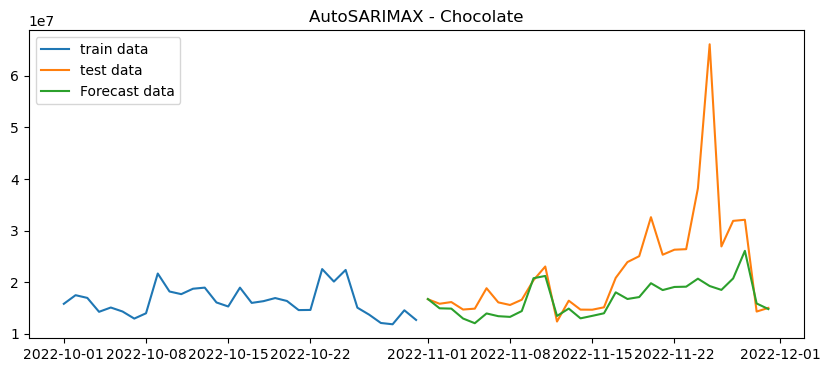

RMSE : 10394629 
MAE : 5716587 
MAPE : 19.4 %


In [73]:
model_assessment(train.y.loc['2022-10'],test.y,predictions_sarimax,"AutoSARIMAX - Chocolate")

## Cross Validation

In [79]:
model_cv = ARIMA(order=(2,1,2), seasonal_order = (2,0,2,7))

In [80]:
cv = model_selection.RollingForecastCV(h=30, step=15, initial=df.shape[0]-180)

In [81]:
cv_score = model_selection.cross_val_score(model_cv,
                                           y = df['y'],
                                           X = df.iloc[:,1:3],
                                           scoring = 'mean_squared_error',
                                           cv = cv,
                                           error_score = 1000000000000000)

c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\saad1\anaconda3\Lib\s

In [85]:
np.sqrt(np.average(cv_score))

4405897.210864073

## Parameter Tuning

In [87]:
param_grid = {'p':[1,2,3],
              'd':[0,1],
              'q':[1,2,3],
              'P':[1,2],
              'D':[0],
              'Q':[1,2]}
grid = ParameterGrid(param_grid)
list(grid)

[{'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 1, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 1, 'q': 3},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 2, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 2, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 2, 'q': 3},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 3, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 3, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 3, 'q': 3},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 1, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 1, 'q': 3},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 2, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 2, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 2, 'q': 3},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 3, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 3, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 3, 'q': 3},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 

In [89]:
rmse_list = []


for params in grid:
    model_cv = ARIMA(order=(params['p'],params['d'],params['q']), seasonal_order = (params['P'],params['D'],params['Q'],7))
    cv = model_selection.RollingForecastCV(h=30, step=15, initial=df.shape[0]-180)
    cv_score = model_selection.cross_val_score(model_cv,
                                           y = df['y'],
                                           X = df.iloc[:,1:3],
                                           scoring = 'mean_squared_error',
                                           cv = cv,
                                           error_score = 1000000000000000)
    rmse = np.sqrt(np.average(cv_score))
    rmse_list.append(rmse)
    


c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramete

In [90]:
tuning_results = pd.DataFrame(grid)
tuning_results['RMSE'] = rmse_list
tuning_results.head()

,D,P,Q,d,p,q,RMSE
0,0,1,1,0,1,1,4.062626e+06
1,0,1,1,0,1,2,4.045200e+06
2,0,1,1,0,1,3,4.044972e+06
3,0,1,1,0,2,1,4.059187e+06
4,0,1,1,0,2,2,4.057299e+06


In [94]:
best_params = tuning_results[tuning_results['RMSE']==tuning_results['RMSE'].min()].transpose()
best_params

,37
D,0.000000e+00
P,2.000000e+00
Q,1.000000e+00
d,0.000000e+00
p,1.000000e+00
q,2.000000e+00
RMSE,4.014442e+06


## Predicting Future with Best Model

In [93]:
y = df.y
X = df.iloc[:,1:3]

In [95]:
p = int(best_params.loc['p'])
d = int(best_params.loc['d'])
q = int(best_params.loc['q'])
P = int(best_params.loc['P'])
D = int(best_params.loc['D'])
Q = int(best_params.loc['Q'])

C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\517194623.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p = int(best_params.loc['p'])
C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\517194623.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  d = int(best_params.loc['d'])
C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\517194623.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  q = int(best_params.loc['q'])
C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\517194623.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  P = int(best_params.loc['P'])
C:\Users\saad1\AppData\Local\Temp\ipykernel_22708\51

In [98]:
# Set the index when we import the data
df_future = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\ARIMA, SARIMA and SARIMAX\future_regressors.csv", index_col = "date", parse_dates=True, dayfirst=True)
df_future.head()

,revenue,discount_rate,coupon_rate,discount_rate_lag1,coupon_rate_lag1
date,,,,,
2022-12-01,NaN,0.1831,0.0031,0.1710,0.0032
2022-12-02,NaN,0.1995,0.0036,0.1831,0.0031
2022-12-03,NaN,0.2029,0.0032,0.1995,0.0036
2022-12-04,NaN,0.1898,0.0030,0.2029,0.0032
2022-12-05,NaN,0.1810,0.0042,0.1898,0.0030


In [99]:
df_future['discount_rate'] = df_future['discount_rate']*100
df_future['coupon_rate'] = df_future['coupon_rate']*100

In [100]:
df_future.head()

,revenue,discount_rate,coupon_rate,discount_rate_lag1,coupon_rate_lag1
date,,,,,
2022-12-01,NaN,18.31,0.31,0.1710,0.0032
2022-12-02,NaN,19.95,0.36,0.1831,0.0031
2022-12-03,NaN,20.29,0.32,0.1995,0.0036
2022-12-04,NaN,18.98,0.30,0.2029,0.0032
2022-12-05,NaN,18.10,0.42,0.1898,0.0030


In [102]:
exog_X = df_future.iloc[:,1:3]
exog_X.head()

,discount_rate,coupon_rate
date,,
2022-12-01,18.31,0.31
2022-12-02,19.95,0.36
2022-12-03,20.29,0.32
2022-12-04,18.98,0.30
2022-12-05,18.10,0.42


In [103]:
best_model = ARIMA(order=(p,d,q), seasonal_order=(P,D,Q,7))


In [104]:
best_model.fit(y, X=X)

ARIMA(order=(1, 0, 2), seasonal_order=(2, 0, 1, 7))

In [106]:
best_predictions = best_model.predict(n_periods=len(exog_X), X = exog_X)
best_predictions

2022-12-01    2.010548e+07
2022-12-02    2.681082e+07
2022-12-03    2.018611e+07
2022-12-04    2.205092e+07
2022-12-05    1.985358e+07
2022-12-06    1.790099e+07
2022-12-07    1.843705e+07
2022-12-08    2.034503e+07
2022-12-09    2.532452e+07
2022-12-10    1.781418e+07
2022-12-11    2.211309e+07
2022-12-12    2.042606e+07
2022-12-13    1.832378e+07
2022-12-14    2.074388e+07
2022-12-15    2.340213e+07
2022-12-16    2.589128e+07
2022-12-17    2.096915e+07
2022-12-18    2.238017e+07
2022-12-19    2.076511e+07
2022-12-20    1.947285e+07
2022-12-21    2.085241e+07
2022-12-22    2.270067e+07
2022-12-23    2.699940e+07
2022-12-24    2.380499e+07
2022-12-25    2.582299e+07
2022-12-26    2.909280e+07
2022-12-27    2.655334e+07
2022-12-28    2.696333e+07
2022-12-29    2.415395e+07
2022-12-30    2.614794e+07
2022-12-31    2.356470e+07
Freq: D, dtype: float64